In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_raw = pd.read_csv("Performance_track_records_Fall2019_out.csv")

In [16]:
def Insert_row(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number]  
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:]   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2])   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])]    
    # Return the updated dataframe 
    return df_result

def find_partialmax(df,column_num,start_row,end_row):
    return df.iloc[:,column_num].iloc[start_row:end_row].max()

# put each strategy into a independent df
strategy_names = []
df_collection = {}
for i in range(24):
    new_name = "strategy_" + str(i)
    strategy_names.append(new_name)
    # insert a row in each 
    df_collection[new_name]  = Insert_row(0,df_raw.iloc[:,[1,2,i+3]].copy(),0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
def find_dd(df,dd_column_name):
    Insert_row(1,df,100)
    df["_price"] = 100
    for i in range(len(df.iloc[:,0])-1):
        df["_price"].iloc[i+1] = df["_price"].iloc[i] * (1+df.iloc[:,2].iloc[i+1])
    
    df[dd_column_name] = 0
    for i in range(len(df.iloc[:,0])):
        df[dd_column_name].iloc[i] = 1-(df["_price"].copy().iloc[i]/find_partialmax(df,3,0,i))
    
    df.drop(df.index[0],inplace=True) 
    df.index = [*range(df.shape[0])]
    
    return df.nlargest(10, ['dd']) 

In [18]:
dd_result_collection = {}
for i in df_collection:
    dd_result_collection[i] = find_dd(df_collection[i],"dd")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
#Insert_row(1,df_collection["strategy_0"],100)

#df_collection["strategy_0"]["price"] = 100
#for i in range(len(df_collection["strategy_0"].iloc[:,0])-1):
    #df_collection["strategy_0"]["price"].iloc[i+1] = df_collection["strategy_0"]["price"].iloc[i] * (1+df_collection["strategy_0"].iloc[:,2].iloc[i+1])

#df_collection["strategy_0"]["dd"] = 0
#for i in range(len(df_collection["strategy_0"].iloc[:,0])):
               #df_collection["strategy_0"]["dd"].iloc[i] = 1-(df_collection["strategy_0"]["price"].copy().iloc[i]/find_partialmax(df_collection["strategy_0"],3,0,i)) 
#df_collection["strategy_0"].drop(df_collection["strategy_0"].index[0],inplace=True) 
#df_collection["strategy_0"].index = [*range(df_collection["strategy_0"].shape[0])] 

I. Plot the price trend 
<br>
<br>
II.Chart and Graph
1. Sharpe ratio: (return - financing rate)/Vol &  information ratio: return / Vol
2. Total Ret
3. Average Daily Return
4. Aunnalized volatility of daily returns
5. DrawDown: Cumulative negative Pnl since last high
6. Total pref/DD

In [ ]:
Avg Daily Rets

In [19]:
df_raw.describe()

,Price_Close,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1222.824662,0.000204,0.000163,0.000196,0.000227,0.000191,0.000213,0.000121,0.000140,0.000133,...,0.000184,0.000198,0.000165,0.000227,0.000159,0.000156,0.000148,0.000165,0.000176,0.000238
std,88.533641,0.003471,0.003500,0.003722,0.003501,0.003424,0.003392,0.003403,0.003356,0.003304,...,0.004025,0.003870,0.003959,0.003833,0.003940,0.003920,0.003536,0.003848,0.003858,0.003716
min,0.000000,-0.018595,-0.019087,-0.031994,-0.018089,-0.010474,-0.010500,-0.018775,-0.010306,-0.013769,...,-0.032028,-0.018482,-0.018862,-0.018176,-0.018720,-0.018886,-0.011742,-0.034551,-0.019530,-0.018253
25%,1172.765000,-0.001395,-0.001542,-0.001560,-0.001505,-0.001403,-0.001359,-0.001363,-0.001345,-0.001775,...,-0.001965,-0.001896,-0.001955,-0.001819,-0.002018,-0.002020,-0.001955,-0.001934,-0.002082,-0.001799
50%,1227.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000072,0.000067,0.000032,0.000014,0.000000,0.000000,0.000000,0.000073,0.000000,0.000037
75%,1288.785000,0.001849,0.001791,0.001883,0.001837,0.001725,0.001727,0.001547,0.001534,0.001865,...,0.002295,0.002165,0.002266,0.002255,0.002265,0.002218,0.002197,0.002213,0.002197,0.002180
max,1383.030000,0.018107,0.018237,0.017624,0.017699,0.018051,0.017594,0.018073,0.018136,0.014706,...,0.018059,0.018320,0.018655,0.017944,0.018555,0.018587,0.014453,0.014628,0.018361,0.018151


Sharpe ratio & info ratio

In [27]:
result = pd.DataFrame(columns = ["DateTime","Proce_Close","Strategy","Price","dd"])
for i in dd_result_collection:
    result = pd.concat([result,dd_result_collection[i]],ignore_index=True)

In [29]:
result.to_csv("dd_toatal.csv")

In [66]:
info_ratios = []
sharpe_ratios = []
for i in df_collection:
    info_ratios.append(((df_collection[i]["_price"].iloc[len(df_collection[i]["_price"])-1]-100)/100)/df_collection[i]["_price"].values.std(ddof=1))
    sharpe_ratios.append(((df_collection[i]["_price"].iloc[len(df_collection[i]["_price"])-1]-100)/100-0.02*np.sqrt(783/252))/df_collection[i]["_price"].values.std(ddof=1))

In [74]:
info_ratios

[0.03082734484143863,
 0.02948287642103877,
 0.02441266931776129,
 0.03134763099434202,
 0.033640598181399625,
 0.03156679722600542,
 0.030603623799532433,
 0.03339574250636623,
 0.03648330006713591,
 0.03304958055175397,
 0.03536129725610913,
 0.03323189002697817,
 0.032318989934878646,
 0.030525541645335885,
 0.023840888578162557,
 0.028988873713745117,
 0.03231390689905099,
 0.03060249206516854,
 0.02956869624843302,
 0.02783957769384922,
 0.032948526082592876,
 0.0303926223904838,
 0.035677096970048276,
 0.03313293977259533]

Total Rets

In [46]:
final_prices = []
for i in df_collection:
    final_prices.append(df_collection[i]["_price"].iloc[len(df_collection[i]["_price"])-1])

In [65]:
total_ret = [i/100-1 for i in final_prices]
total_ret

[0.16785955974805877,
 0.13063375773802965,
 0.1593448712735661,
 0.18917677113603948,
 0.15578471738350452,
 0.17604187934680615,
 0.09453408299755517,
 0.11103319439301473,
 0.10490921275420662,
 0.12273562985918329,
 0.17609637169447323,
 0.18360117050482905,
 0.1237254094850444,
 0.11292064749913311,
 0.14741708547642518,
 0.16076912251064113,
 0.13099194347475795,
 0.1877272831753225,
 0.1259454408430063,
 0.12296715260203794,
 0.1174915257791822,
 0.1310308555256947,
 0.14096549356156296,
 0.1987063502812254]

Annual Std of return

In [52]:
df_daily = df_raw.describe()

In [63]:
df_daily.iloc[2]*np.sqrt(252)

Price_Close    1405.427985
03_01             0.055101
03_02             0.055557
03_03             0.059084
03_04             0.055572
03_05             0.054361
03_06             0.053840
03_07             0.054016
03_08             0.053274
03_09             0.052442
03_10             0.054910
03_11             0.053792
03_12             0.053449
01_01             0.061679
01_02             0.061915
01_03             0.063891
01_04             0.061429
01_05             0.062841
01_06             0.060851
01_07             0.062553
01_08             0.062224
01_09             0.056129
01_10             0.061088
01_11             0.061248
01_12             0.058987
Name: std, dtype: float64

Pref / maxDD

In [78]:
max_dd = []
pref_over_maxDD = []
for i in dd_result_collection:
    max_dd.append(dd_result_collection[i]["dd"].values.max())
for i in range(len(max_dd)):
    pref_over_maxDD.append(total_ret[i]/max_dd[i])

In [79]:
pref_over_maxDD

[3.1219060175696085,
 1.8956417384687625,
 3.340346770320174,
 4.424647615334086,
 3.4179803565828766,
 3.7177220381349967,
 1.5322212346411623,
 1.9635168477017884,
 1.7387526704025413,
 2.5982843253778203,
 3.9887106252710316,
 3.33140918554963,
 1.8639150725652032,
 1.5818349370629172,
 3.2030566832713006,
 2.870345036324596,
 2.09078535097867,
 3.717558795525467,
 2.2990697487484777,
 2.2911097126277693,
 3.2167786644733685,
 2.5361881323148516,
 2.254330158944482,
 3.5300439063083133]

Graphing:

In [82]:
dd_result_collection

{'strategy_0':             DateTime  Price_Close     03_01      _price        dd
 600  4/20/2016 17:00      1243.84 -0.002044  109.109604  0.053768
 601  4/21/2016 17:00      1247.75  0.002046  109.332834  0.051832
 599  4/19/2016 17:00      1249.98 -0.006231  109.333026  0.051831
 605  4/27/2016 17:00      1245.65 -0.000865  109.410019  0.051163
 604  4/26/2016 17:00      1243.04 -0.001789  109.504759  0.050341
 523   1/4/2016 17:00      1074.35 -0.008104  108.632231  0.049543
 596  4/14/2016 17:00      1227.54 -0.004984  109.653834  0.049049
 603  4/25/2016 17:00      1237.65 -0.001890  109.701033  0.048639
 537  1/22/2016 17:00      1097.20 -0.001423  108.743633  0.048568
 524   1/5/2016 17:00      1077.18  0.001104  108.752201  0.048493,
 'strategy_1':             DateTime  Price_Close     03_02      _price        dd
 605  4/27/2016 17:00      1245.65 -0.000907  105.925159  0.068913
 606  4/28/2016 17:00      1265.49  0.000560  105.984458  0.068391
 604  4/26/2016 17:00      1243.0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


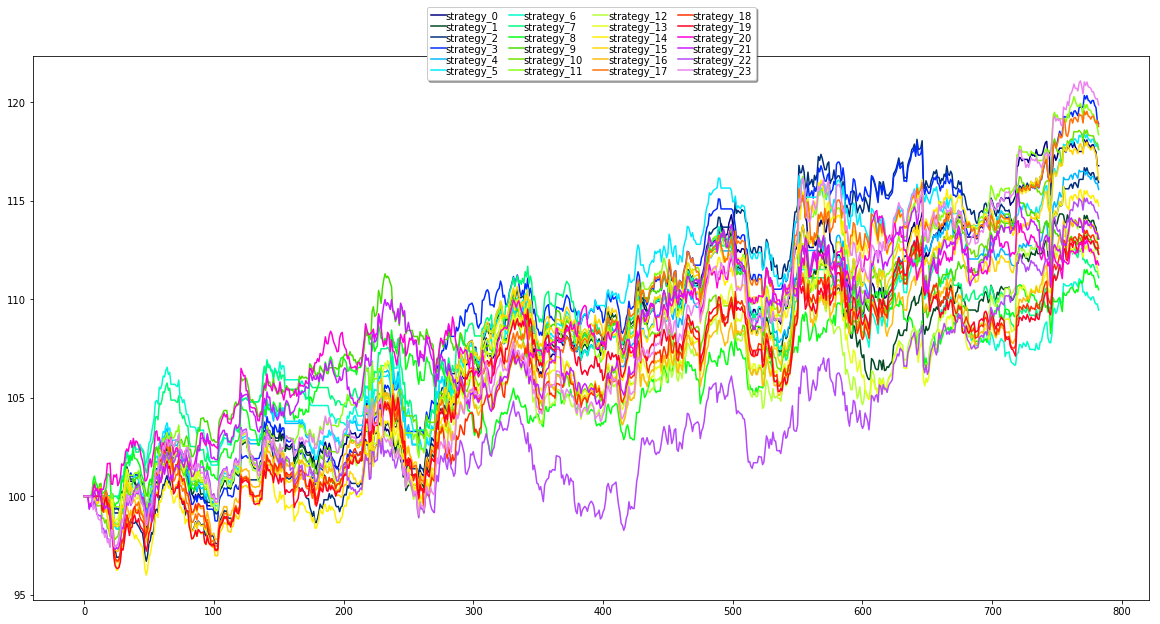

In [97]:
colormap = plt.cm.gist_ncar
num_plots = 24
labels = []
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, num_plots)])
for i in dd_result_collection:
    plt.plot(df_collection[i].index,df_collection[i]["_price"])
    labels.append(i)
    plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    plt.rc('figure', figsize=(40, 20))
plt.show()
